In [75]:
%pylab inline
import pandas as pd
from sklearn import neighbors, metrics, preprocessing, model_selection, dummy

Populating the interactive namespace from numpy and matplotlib


C:\Users\jdouet\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['size']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [5]:
data=pd.read_csv("winequality-white.csv", sep=";")

In [6]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [18]:
scaler=preprocessing.StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [23]:
Xtrain, Xtest, ytrain, ytest = model_selection.train_test_split(X_scaled, y, test_size=0.2, stratify=y)

In [30]:
regressor=neighbors.KNeighborsRegressor(n_neighbors=11)
regressor.fit(Xtrain, ytrain)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=11, p=2,
          weights='uniform')

In [31]:
y_predicted=regressor.predict(Xtest)

In [33]:
rmse=np.sqrt(metrics.mean_squared_error(ytest, y_predicted))
print("RMSE=",rmse)

RMSE= 0.7202935066386844


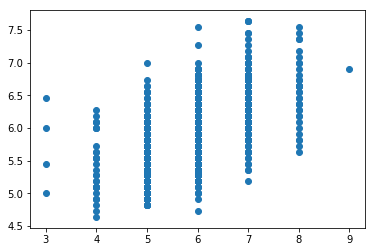

In [36]:
plt.scatter(ytest,y_predicted)

In [43]:
sizes={}
for (yt,yp) in zip(ytest,y_predicted):
    if (yt,yp) in sizes:
        sizes[(yt,yp)]+=1
    else:
        sizes[(yt,yp)]=1
keys=sizes.keys()

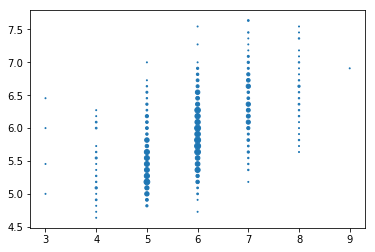

In [49]:

plt.scatter([k[0] for k in keys],[k[1] for k in keys],[sizes[k] for k in keys])

In [63]:
y_predicted_random=np.random.randint(np.min(ytest), np.max(ytest), ytest.size)
rmse_random=np.sqrt(metrics.mean_squared_error(ytest,y_predicted_random))
print("RMSE RANDOM=",rmse_random)

RMSE RANDOM= 2.0015300269992435


In [64]:
sizes_random={}
for (yt,yp) in zip(ytest,y_predicted_random):
    if (yt,yp) in sizes_random:
        sizes_random[(yt,yp)]+=1
    else:
        sizes_random[(yt,yp)]=1
keys_random=sizes_random.keys()

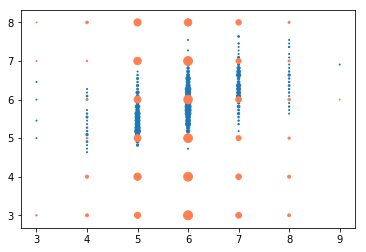

In [68]:
plt.scatter([k[0] for k in keys],[k[1] for k in keys],[sizes[k] for k in keys])
plt.scatter([k[0] for k in keys_random],[k[1] for k in keys_random],[sizes_random[k] for k in keys_random], color='coral')

In [73]:
y_predicted_constant=[6 for i in ytest]
rmse_constant=np.sqrt(metrics.mean_squared_error(ytest,y_predicted_constant))
print("RMSE CONSTANT=",rmse_constant)

RMSE CONSTANT= 0.8944271909999159


In [77]:
dummy_regressor=dummy.DummyRegressor(strategy="mean")
dummy_regressor.fit(Xtrain,ytrain)
y_predicted_dummy_mean=dummy_regressor.predict(Xtest)
rmse_dummy_mean=np.sqrt(metrics.mean_squared_error(ytest,y_predicted_dummy_mean))
print("RMSE DUMMY MEAN=",rmse_dummy_mean)

RMSE DUMMY MEAN= 0.8860058961789596
